In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_pickle(r'1.cleaned_employee_data.pkl')

In [3]:
pd.set_option('display.max_columns', None)

In [6]:
df

,employee_id,age,gender,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,distance_from_home,education_level,marital_status,number_of_dependents,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition
0,8410,31,1,Education,5390,Excellent,Medium,Average,2,0,22,Associate Degree,Married,0,Mid,Medium,0,0,0,Excellent,Medium,0
1,64756,59,0,Media,5534,Poor,High,Low,3,0,21,Master’s Degree,Divorced,3,Mid,Medium,0,0,0,Fair,Low,0
2,30257,24,0,Healthcare,8159,Good,High,Low,0,0,11,Bachelor’s Degree,Married,3,Mid,Medium,0,0,0,Poor,Low,0
3,65791,36,0,Education,3989,Good,High,High,1,0,27,High School,Single,2,Mid,Small,1,0,0,Good,Medium,0
4,65026,56,1,Education,4821,Fair,Very High,Average,0,1,71,High School,Divorced,0,Senior,Medium,0,0,0,Fair,Medium,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,0,Healthcare,7830,Poor,Medium,Average,0,1,40,Associate Degree,Single,0,Senior,Medium,0,0,0,Poor,Medium,0
74494,47175,30,0,Education,3856,Good,Medium,Average,2,1,45,Master’s Degree,Married,0,Entry,Medium,0,0,0,Good,Medium,1
74495,12409,52,1,Education,5654,Good,Very High,Below Average,0,0,4,Associate Degree,Married,4,Mid,Small,0,0,0,Good,High,1
74496,9554,18,1,Education,5276,Fair,High,Average,0,0,13,Bachelor’s Degree,Divorced,3,Mid,Large,0,0,0,Poor,High,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74498 entries, 0 to 74497
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   employee_id               74498 non-null  int64   
 1   age                       74498 non-null  int64   
 2   gender                    74498 non-null  int64   
 3   job_role                  74498 non-null  category
 4   monthly_income            74498 non-null  int64   
 5   work_life_balance         74498 non-null  category
 6   job_satisfaction          74498 non-null  category
 7   performance_rating        74498 non-null  category
 8   number_of_promotions      74498 non-null  int64   
 9   overtime                  74498 non-null  int64   
 10  distance_from_home        74498 non-null  int64   
 11  education_level           74498 non-null  category
 12  marital_status            74498 non-null  category
 13  number_of_dependents      74498 non-null  int6

In [ ]:
# Additional features

In [ ]:
#Age Group -> young employees have higher resignation rates..

df['age_group'] = pd.cut(df['age'],
                         bins=[0, 25, 35, 45, df['age'].max() + 1],
                         labels=['Young_18-25', 'Early_Career_26-35', 'Mid_Career_36-45', 'Senior_46+'],
                         right=False) # 'right=False' means [0, 25)

In [ ]:
# Promotions Group -> (0, 2) have higher resignation rates, while +3 promotions reduce significantly resignation rates.
# 1 = has few promotions (0-2)
# 0 = has +3 promotions

df['has_few_promotions'] = (df['number_of_promotions'] <= 2).astype(int)

In [ ]:
# Monthly income log -> created to reduce impact of outliers and use in the regression model..

df['monthly_income_log'] = np.log1p(df['monthly_income']) # log1p handles 0 values gracefully, though income is unlikely to be 0


In [ ]:
# Has many dependents -> employees with fewer dependents (0-3) tend to have higher attrition than those with more (4-6).
# 1 = has many dependents (+4)
# 0 = has fewer dependents (0-3)

df['has_many_dependents'] = (df['number_of_dependents'] >= 4).astype(int)

In [21]:
df

,employee_id,age,gender,job_role,monthly_income,work_life_balance,job_satisfaction,performance_rating,number_of_promotions,overtime,distance_from_home,education_level,marital_status,number_of_dependents,job_level,company_size,remote_work,leadership_opportunities,innovation_opportunities,company_reputation,employee_recognition,attrition,age_group,has_few_promotions,monthly_income_log,has_many_dependents
0,8410,31,1,Education,5390,Excellent,Medium,Average,2,0,22,Associate Degree,Married,0,Mid,Medium,0,0,0,Excellent,Medium,0,Early_Career_26-35,1,8.592486,0
1,64756,59,0,Media,5534,Poor,High,Low,3,0,21,Master’s Degree,Divorced,3,Mid,Medium,0,0,0,Fair,Low,0,Senior_46+,0,8.618847,0
2,30257,24,0,Healthcare,8159,Good,High,Low,0,0,11,Bachelor’s Degree,Married,3,Mid,Medium,0,0,0,Poor,Low,0,Young_18-25,1,9.006999,0
3,65791,36,0,Education,3989,Good,High,High,1,0,27,High School,Single,2,Mid,Small,1,0,0,Good,Medium,0,Mid_Career_36-45,1,8.291547,0
4,65026,56,1,Education,4821,Fair,Very High,Average,0,1,71,High School,Divorced,0,Senior,Medium,0,0,0,Fair,Medium,0,Senior_46+,1,8.480944,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74493,16243,56,0,Healthcare,7830,Poor,Medium,Average,0,1,40,Associate Degree,Single,0,Senior,Medium,0,0,0,Poor,Medium,0,Senior_46+,1,8.965845,0
74494,47175,30,0,Education,3856,Good,Medium,Average,2,1,45,Master’s Degree,Married,0,Entry,Medium,0,0,0,Good,Medium,1,Early_Career_26-35,1,8.257645,0
74495,12409,52,1,Education,5654,Good,Very High,Below Average,0,0,4,Associate Degree,Married,4,Mid,Small,0,0,0,Good,High,1,Senior_46+,1,8.640295,1
74496,9554,18,1,Education,5276,Fair,High,Average,0,0,13,Bachelor’s Degree,Divorced,3,Mid,Large,0,0,0,Poor,High,0,Young_18-25,1,8.571113,0


In [ ]:
# Distributions of new features

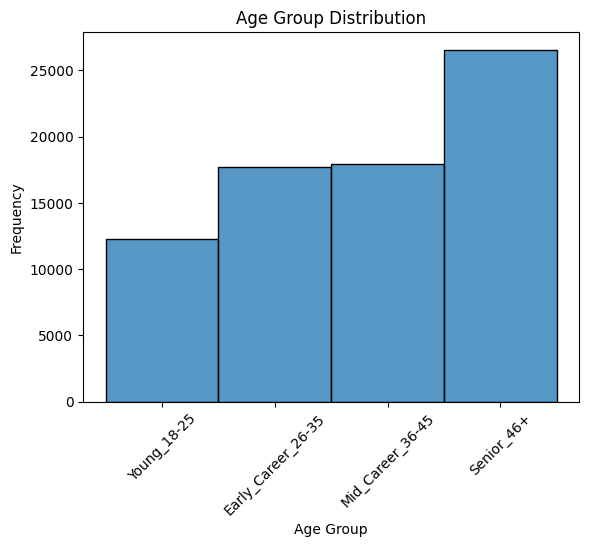

In [24]:
sns.histplot(df['age_group'])
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.show()

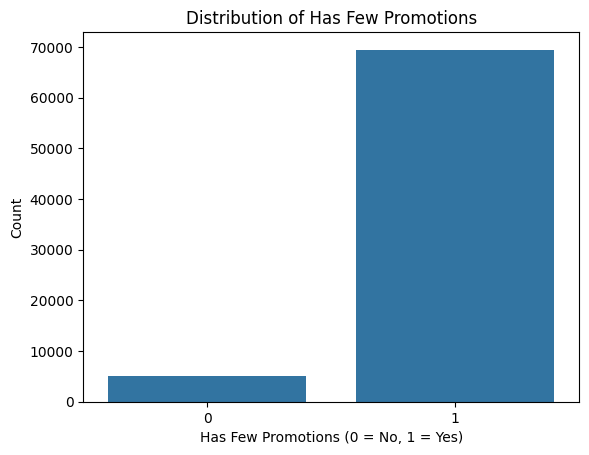

In [27]:
sns.countplot(data=df, x='has_few_promotions')
plt.title('Distribution of Has Few Promotions')
plt.xlabel('Has Few Promotions (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

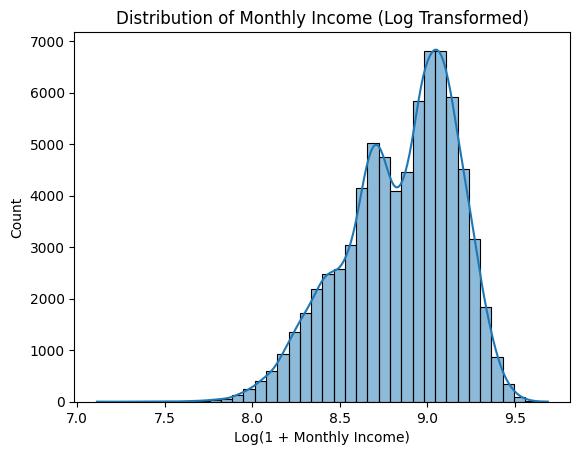

In [28]:
sns.histplot(data=df, x='monthly_income_log', bins=40, kde=True)
plt.title('Distribution of Monthly Income (Log Transformed)')
plt.xlabel('Log(1 + Monthly Income)')
plt.show()

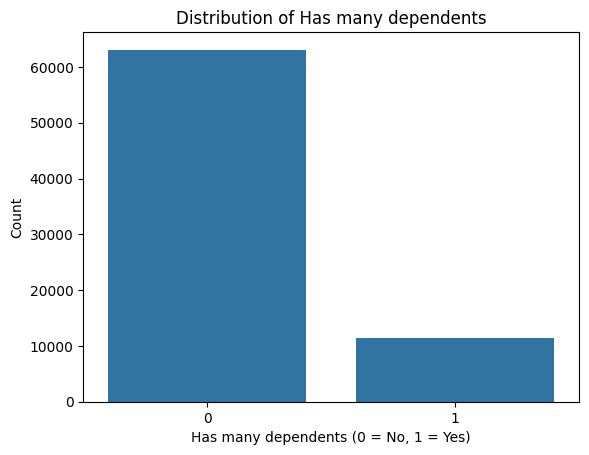

In [29]:
sns.countplot(data=df, x='has_many_dependents')
plt.title('Distribution of Has many dependents')
plt.xlabel('Has many dependents (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

In [ ]:
#Resignation rates by new features

C:\Users\nilvi\AppData\Local\Temp\ipykernel_99768\990042875.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resignation_rate = df.groupby(col)['attrition'].mean().sort_values(ascending=False)


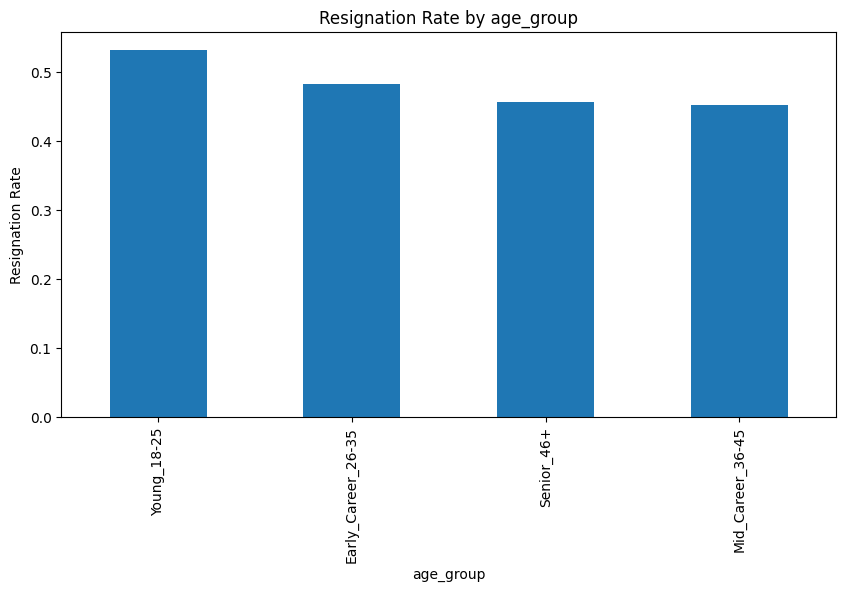

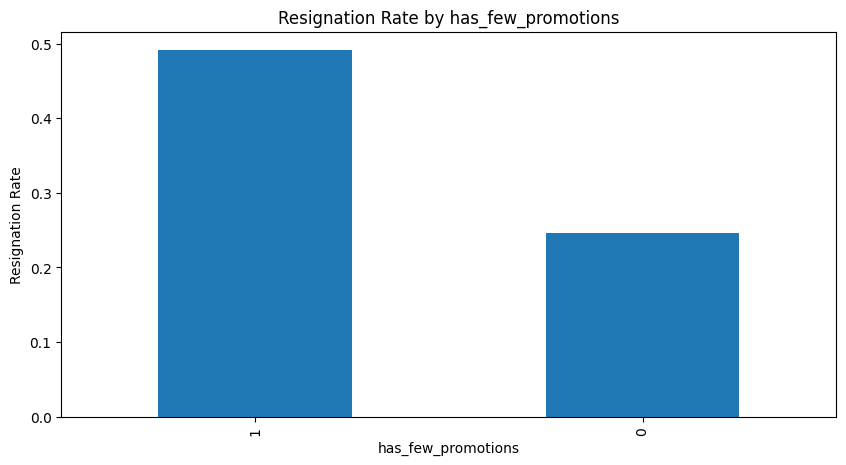

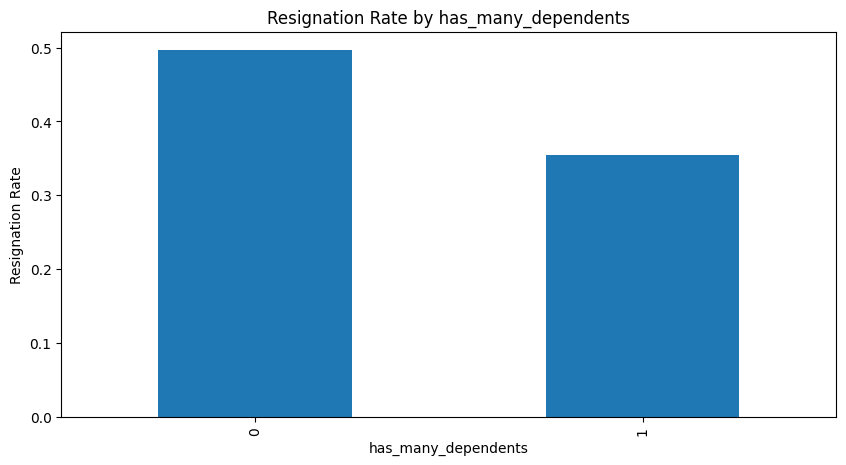

In [31]:
cat_cols = ['age_group', 'has_few_promotions', 'has_many_dependents']

for col in cat_cols:
    resignation_rate = df.groupby(col)['attrition'].mean().sort_values(ascending=False)
    resignation_rate.plot(kind='bar', title=f'Resignation Rate by {col}', figsize=(10, 5))
    plt.ylabel('Resignation Rate')
    plt.show()




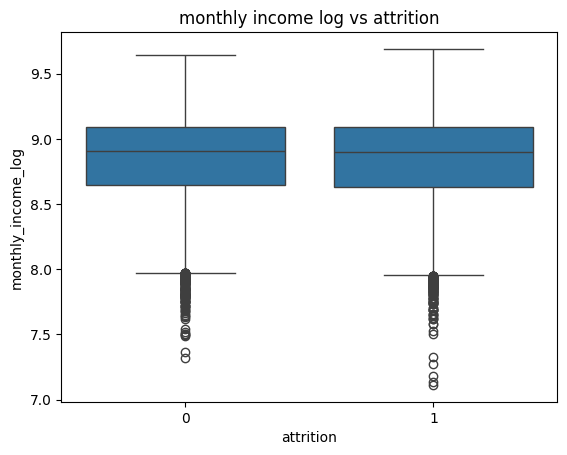

In [32]:
sns.boxplot(x='attrition', y='monthly_income_log', data=df)
plt.title('monthly income log vs attrition')
plt.show()

In [33]:
df.to_pickle('2.featured_employee_data.pkl')

In [34]:
df.to_csv('2.featured_employee_data.csv')